In [414]:
import pandas as pd
import numpy as np
import re
#import math
import time
#%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from nltk.corpus import stopwords
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachelpeled/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [415]:
import plotly
plotly.tools.set_credentials_file(username='helli1987', api_key='cIr0rkndOPJHwHKqchdo')

In [416]:
reviews=pd.read_csv('indeed_reviews.csv')

In [417]:
reviews['tot_review']=reviews.tot_review/20

In [418]:
reviews['Comp_Benef_review']=reviews.Comp_Benef_review/20

In [419]:
reviews['Job_Culture_review']=reviews.Job_Culture_review/20

In [420]:
reviews['Management_review']=reviews.Management_review/20

In [421]:
reviews['Work_Life_review']=reviews.Work_Life_review/20

In [422]:
reviews['Job_Security_Adv']=reviews.Job_Security_Adv/20

In [423]:
reviews

,Comp_Benef_review,Job_Culture_review,Job_Security_Adv,Management_review,Work_Life_review,company,date,jobtitle,location,review_content,title,tot_review
0,5.0,4.0,3.0,4.0,4.0,Apple,"April 8, 2016",Service Specialist,"1981 Broadway New York, NY 10023","I learned a lot about myself, other people as ...",It is a very diverse fun job with many differe...,4.0
1,4.0,4.0,5.0,4.0,5.0,Apple,"August 3, 2018",Tech,"Lancaster, PA",To this day many years after leaving I still s...,Great place to work,5.0
2,2.0,2.0,3.0,3.0,3.0,Apple,"August 3, 2018",freelance designer,"Silicon Valley, CA",I learned better UX design skills with my shor...,"Productive, yet tough",3.0
3,3.0,1.0,2.0,1.0,3.0,Apple,"August 2, 2018",Specialist,"Los Angeles, CA",Was fun for a while but mgmt. was too busy doi...,hmmm,3.0
4,5.0,3.0,3.0,4.0,1.0,Apple,"August 2, 2018",Sr Manager of Platform Architecture,"Cupertino, CA","Grueling commute from Oakland, no free lunches...",Demanding,3.0
5,5.0,5.0,5.0,5.0,5.0,Apple,"August 2, 2018",Computer Tier 2 Technical Support,Work at Home,I loved working here! When I started I had ne...,Great company,5.0
6,4.0,5.0,4.0,4.0,4.0,Apple,"August 1, 2018",Specialist,"Manhattan Beach, CA",Very fast paced place to work. You get to inte...,Great People,5.0
7,5.0,5.0,5.0,5.0,5.0,Apple,"August 1, 2018",Apple Technical Advisor,"Sumter, SC",great jlob I love working there the sups are f...,fun,5.0
8,3.0,1.0,1.0,1.0,1.0,Apple,"August 1, 2018",Inventory Specialist,"Chicago, IL",If you like your life and happiness don’t work...,It sucked. Management was a joke!,1.0
9,1.0,4.0,4.0,4.0,4.0,Apple,"August 1, 2018",iOS Teir 1 Agent,"San Antonio, TX",The only thing I did not like is that there wa...,Good place to work,4.0


In [424]:
reviews['date']=[reviews.date[i].split(',',1)[1] for i in range(len(reviews))]
# changing the date to years

In [425]:
reviews=reviews[['company','location','date','jobtitle','tot_review','Comp_Benef_review',
         'Job_Culture_review','Job_Security_Adv','Management_review','Work_Life_review','title','review_content']]
#reordering the columns

In [426]:
## filtering reviewers who gave only final score withount scoring other elements =0
reviews=reviews[sum([reviews.Comp_Benef_review ,reviews.Job_Culture_review ,
             reviews.Job_Security_Adv,reviews.Management_review,reviews.Work_Life_review])!=0]



In [427]:
subset_google=reviews.loc[reviews.company=='Google']

In [428]:
set(reviews.company)

{'Amazon.com', 'Apple', 'Facebook', 'Google', 'Netflix'}

In [429]:
subset_google

,company,location,date,jobtitle,tot_review,Comp_Benef_review,Job_Culture_review,Job_Security_Adv,Management_review,Work_Life_review,title,review_content
283,Google,"Manhattan, NY",2017,Store Operator / Lead Supervisor,5.0,5.0,5.0,5.0,5.0,5.0,Great Experience,Great Job that i gained great experience but u...
284,Google,"Mountainview, CA",2011,Technical Sourcer,4.0,5.0,2.0,4.0,2.0,1.0,The Google HR MAchine,I worked in the Google HR team so I can really...
285,Google,"New York, NY and Santa Monica, CA",2011,"Software Enginer, Tech Lead/Manager",5.0,5.0,5.0,5.0,5.0,5.0,"Fantastic people, exciting work, great culture",I loved my time at Google. I started as an eng...
21741,Google,"Manhattan, NY",2017,Store Operator / Lead Supervisor,5.0,5.0,5.0,5.0,5.0,5.0,Great Experience,Great Job that i gained great experience but u...
21742,Google,"Cambridge, MA",2012,TPM,5.0,5.0,5.0,5.0,5.0,5.0,Great place,"Great place, awesome place, would work here ag..."
21744,Google,"Mountain View, CA",2012,Scan Operator/ Data Entry Clerk,5.0,5.0,5.0,5.0,5.0,5.0,Very diverse and fun workplace.,"A typical day at work was exactly that, it was..."
21745,Google,"Mountain View, CA",2012,Operations Specialist,5.0,5.0,5.0,5.0,0.0,5.0,Gotta love this place,Typical day starts with the first meal of the ...
21746,Google,"Mountain View, CA",2012,Quality Control,2.0,1.0,1.0,3.0,1.0,2.0,Ping pong tables,Didn't like this place. Everyone who worked he...
21747,Google,Dublin,2012,Local Data Evaluator,4.0,3.0,5.0,2.0,3.0,3.0,Productive and Fun workplace,"As a Data Evaluator, i analyzed data for a pro..."
21749,Google,"Mountain View, CA",2012,Global Vendor Manager,4.0,5.0,4.0,3.0,3.0,3.0,Google,Google is an amazing place to work and its not...


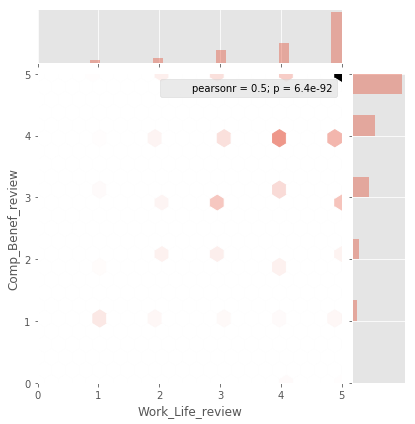

In [430]:
sns.jointplot(x='Work_Life_review',y='Comp_Benef_review',data=subset_google,kind='hex')

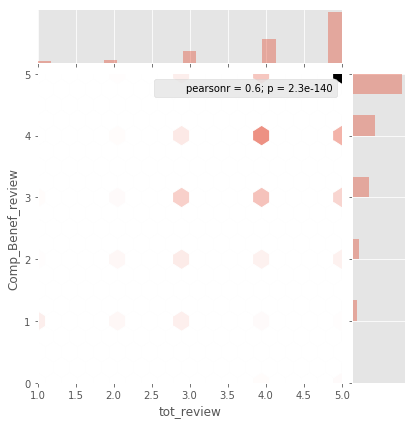

In [431]:
sns.jointplot(x='tot_review',y='Comp_Benef_review',data=subset_google,kind='hex')

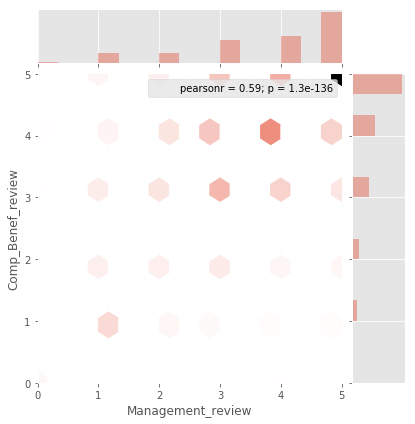

In [432]:
sns.jointplot(x='Management_review',y='Comp_Benef_review',data=subset_google,kind='hex')

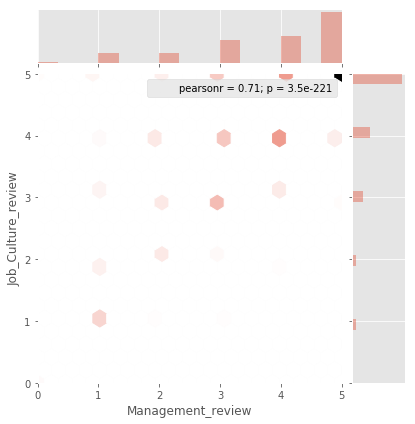

In [433]:
sns.jointplot(x='Management_review',y='Job_Culture_review',data=subset_google,kind='hex')

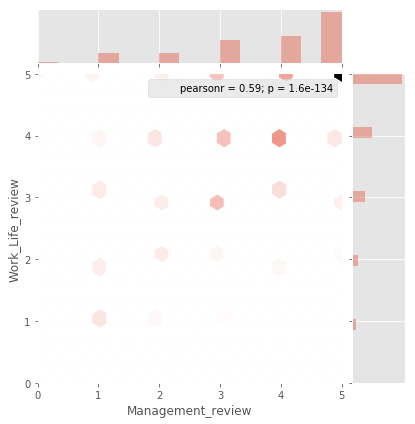

In [434]:
sns.jointplot(x='Management_review',y='Work_Life_review',data=subset_google,kind='hex')

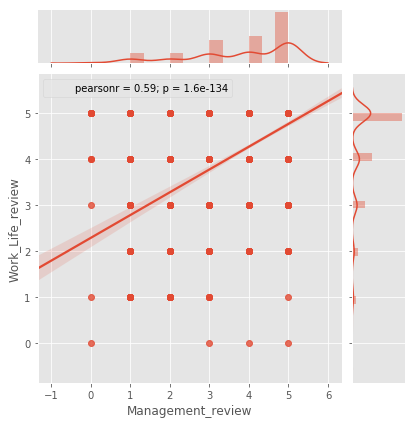

In [435]:
sns.jointplot(x='Management_review',y='Work_Life_review',data=subset_google,kind='reg')

In [436]:
len(reviews.Work_Life_review[reviews.company=="Google"])

1441

In [437]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

y0 = list(reviews.Comp_Benef_review[reviews.company=="Apple"])
y1 = list(reviews.Job_Culture_review[reviews.company=="Apple"])
y2 = list(reviews.Job_Security_Adv[reviews.company=="Apple"]) 
y3 = list(reviews.Management_review[reviews.company=="Apple"])
y4 = list(reviews.Work_Life_review[reviews.company=="Apple"])

trace0 = go.Box(
    y=y0,
    name = 'Comp_Benef_review',
    marker = dict(
        color = '#FF851B',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Job_Culture_review',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Job_Security_Adv',
    marker = dict(
        color = '#3D9970',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Management_review',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Work_Life_review',
    marker = dict(
        color = '#FF4136',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
py.iplot(data)

In [438]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

y0 = list(reviews.Comp_Benef_review[reviews.company=="Facebook"])
y1 = list(reviews.Job_Culture_review[reviews.company=="Facebook"])
y2 = list(reviews.Job_Security_Adv[reviews.company=="Facebook"]) 
y3 = list(reviews.Management_review[reviews.company=="Facebook"])
y4 = list(reviews.Work_Life_review[reviews.company=="Facebook"])

trace0 = go.Box(
    y=y0,
    name = 'Comp_Benef_review',
    marker = dict(
        color = '#FF851B',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Job_Culture_review',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Job_Security_Adv',
    marker = dict(
        color = '#3D9970',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Management_review',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Work_Life_review',
    marker = dict(
        color = '#FF4136',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
py.iplot(data)

In [470]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

y0 = list(reviews.Comp_Benef_review[reviews.company=="Netflix"])
y1 = list(reviews.Job_Culture_review[reviews.company=="Netflix"])
y2 = list(reviews.Job_Security_Adv[reviews.company=="Netflix"]) 
y3 = list(reviews.Management_review[reviews.company=="Netflix"])
y4 = list(reviews.Work_Life_review[reviews.company=="Netflix"])

trace0 = go.Box(
    y=y0,
    name = 'Comp_Benef_review',
    marker = dict(
        color = '#FF851B',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Job_Culture_review',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Job_Security_Adv',
    marker = dict(
        color = '#3D9970',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Management_review',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Work_Life_review',
    marker = dict(
        color = '#FF4136',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
py.iplot(data)

In [471]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

y0 = list(reviews.Comp_Benef_review[reviews.company=="Amazon.com"])
y1 = list(reviews.Job_Culture_review[reviews.company=="Amazon.com"])
y2 = list(reviews.Job_Security_Adv[reviews.company=="Amazon.com"]) 
y3 = list(reviews.Management_review[reviews.company=="Amazon.com"])
y4 = list(reviews.Work_Life_review[reviews.company=="Amazon.com"])

trace0 = go.Box(
    y=y0,
    name = 'Comp_Benef_review',
    marker = dict(
        color = '#FF851B',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Job_Culture_review',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Job_Security_Adv',
    marker = dict(
        color = '#3D9970',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Management_review',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Work_Life_review',
    marker = dict(
        color = '#FF4136',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
py.iplot(data)

In [472]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

y0 = list(reviews.Comp_Benef_review[reviews.company=="Google"])
y1 = list(reviews.Job_Culture_review[reviews.company=="Google"])
y2 = list(reviews.Job_Security_Adv[reviews.company=="Google"]) 
y3 = list(reviews.Management_review[reviews.company=="Google"])
y4 = list(reviews.Work_Life_review[reviews.company=="Google"])

trace0 = go.Box(
    y=y0,
    name = 'Comp_Benef_review',
    marker = dict(
        color = '#FF851B',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Job_Culture_review',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Job_Security_Adv',
    marker = dict(
        color = '#3D9970',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Management_review',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Work_Life_review',
    marker = dict(
        color = '#FF4136',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
py.iplot(data)

In [779]:
subset_Facebook =reviews[reviews.company=='Facebook']

In [783]:
subset_Facebook=subset_Facebook.groupby('date').mean()

In [784]:
subset_Facebook['tot_review']

date
 2012    3.500000
 2013    4.666667
 2014    4.333333
 2015    3.954545
 2016    4.170732
 2017    4.213592
 2018    4.473684
Name: tot_review, dtype: float64

In [788]:
import plotly.plotly as py
import plotly.graph_objs as go

x = list(subset_Facebook.index)
y = list(subset_Facebook['tot_review'])

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='#FF851B',
               
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

In [ ]:
subset_amazon =reviews[reviews.company=='Amazon.com']

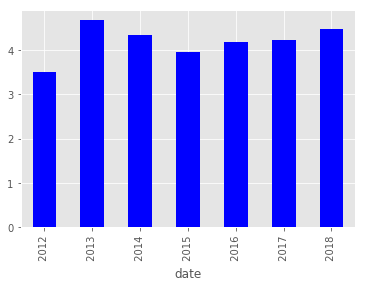

In [778]:
subset_Facebook.groupby('date')['tot_review'].mean().plot.bar(color='b')

In [ ]:
subset_amazon.head()

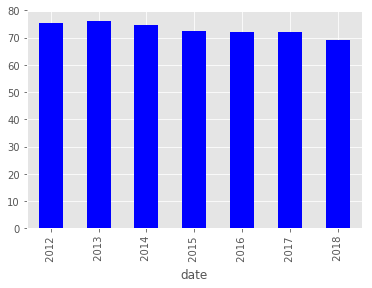

In [440]:
subset_amazon.groupby('date')['tot_review'].mean().plot.bar(color='b')

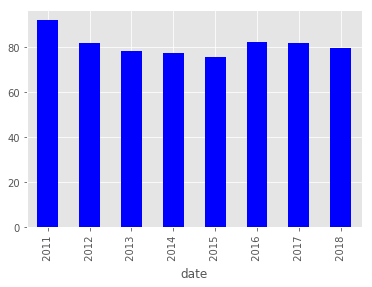

In [284]:
subset_google.groupby('date')['Comp_Benef_review'].mean().plot.bar(color='b')

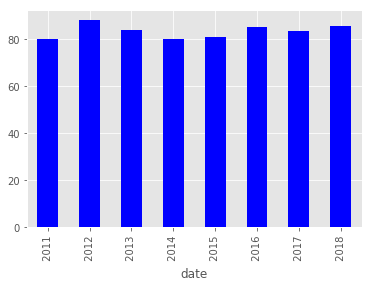

In [285]:
subset_google.groupby('date')['Job_Culture_review'].mean().plot.bar(color='b')

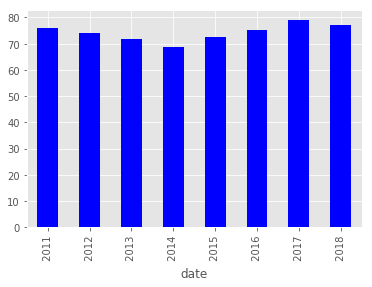

In [286]:
subset_google.groupby('date')['Management_review'].mean().plot.bar(color='b')

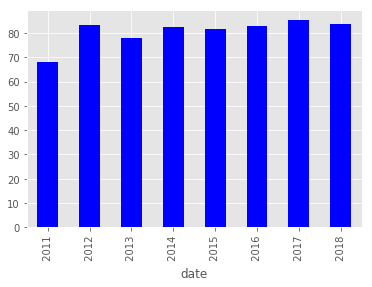

In [287]:
subset_google.groupby('date')['Work_Life_review'].mean().plot.bar(color='b')

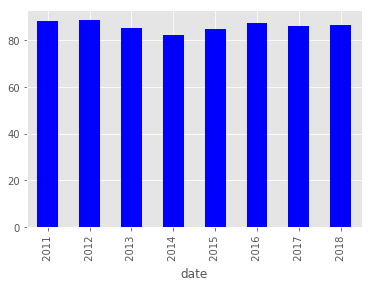

In [91]:
subset_google.groupby('date')['tot_review'].mean().plot.bar(color='b')

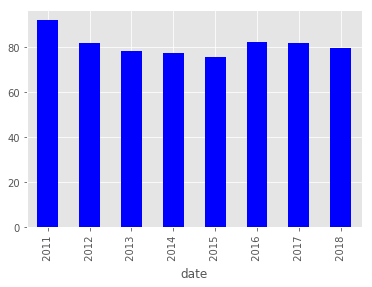

In [288]:
subset_google.groupby('date')['Comp_Benef_review'].mean().plot.bar(color='b')

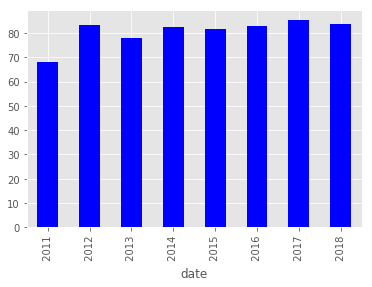

In [289]:
subset_google.groupby('date')['Work_Life_review'].mean().plot.bar(color='b')

In [441]:
mean_rev_by_year_comp=reviews.groupby( ['company','date'])['Comp_Benef_review'].mean()
mean_rev_by_year_comp[0:7]

company     date 
Amazon.com   2012    3.820513
             2013    3.722376
             2014    3.748444
             2015    3.745679
             2016    3.853749
             2017    3.781818
             2018    3.721496
Name: Comp_Benef_review, dtype: float64

In [442]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=list(range(2012,2019))
    y=[20, 14, 25, 16, 18, 22, 19, 15, 12, 16, 14, 17],
    name='Primary Product',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    y=[19, 14, 22, 14, 16, 19, 15, 14, 10, 12, 12, 16],
    name='Secondary Product',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

SyntaxError: invalid syntax (<ipython-input-442-b06656f7cd6a>, line 6)

In [443]:
reviews['review_content']=reviews['review_content'].fillna('')

In [444]:

reviews['review_content'] = reviews['review_content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# \S+ means anything that is not an empty space
reviews['review_content'] = reviews['review_content'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
reviews['review_content'] = reviews['review_content'].apply(lambda x: re.sub('\s+', ' ', x))
# We don't want empty string in our text
reviews = reviews.loc[reviews['review_content'] != ""]

In [445]:

reviews['review_content'] = reviews['review_content'].apply(lambda x: re.sub('[^\w\s]','', x))

In [758]:

stop = stopwords.words('english')
extra = ['google','amazon','netflix','facebook','apple','work','place','job','working','employee','day','hour',
         'dont','worked','lot','make','company','thing','alway','things','part time','time','management','people',
         'manager','employees','one','shift','always','managers','environment','coworker','call','really']
stop = stop + extra
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [759]:
reviews['review_content'] = reviews['review_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

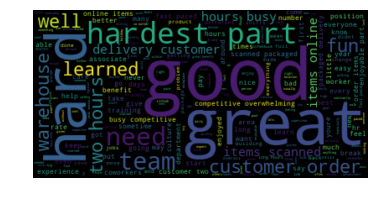

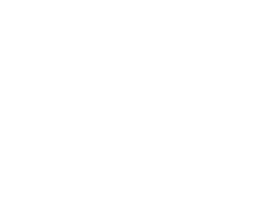

In [768]:
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(reviews[reviews.company=='Amazon.com']['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()
plt.savefig('wordcloudAmazon.png')

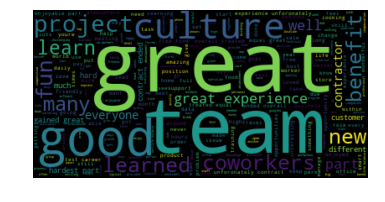

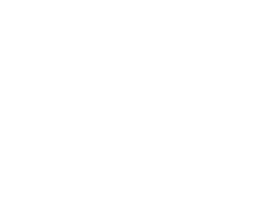

In [769]:
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(reviews[reviews.company=='Google']['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()
plt.savefig('wordcloudGoogle.png')

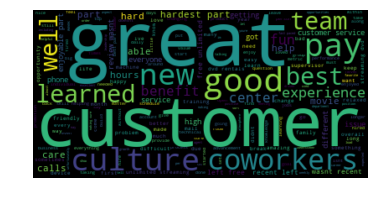

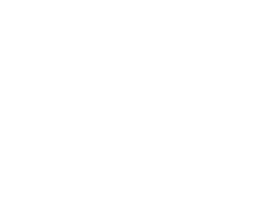

In [762]:
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(reviews[reviews.company=='Netflix']['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

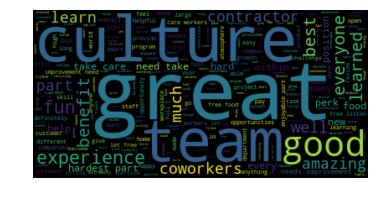

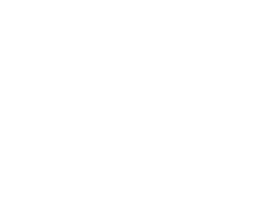

In [770]:
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(reviews[reviews.company=='Facebook']['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()
plt.savefig('wordcloudFacebook.png')

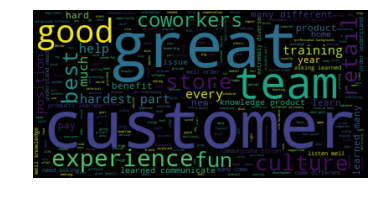

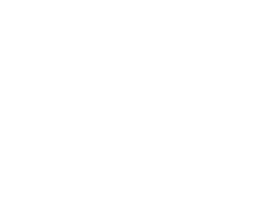

In [771]:
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(reviews[reviews.company=='Apple']['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()
plt.savefig('wordcloudApple.png')

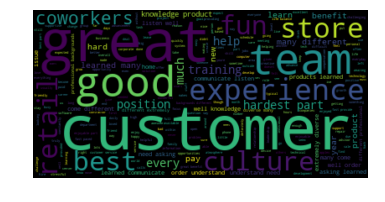

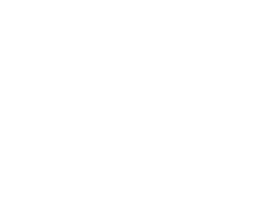

In [765]:
unhappy_apple=reviews[reviews.company=='Apple'].loc[reviews.tot_review <40,:]

wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(unhappy_apple['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

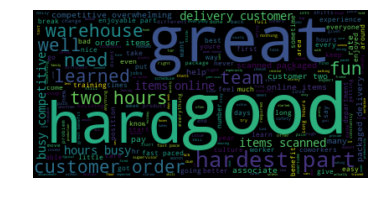

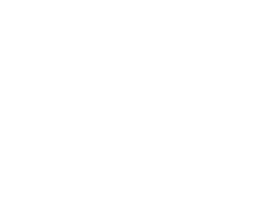

In [766]:
unhappy_amazon=reviews[reviews.company=='Amazon.com'].loc[reviews.tot_review <40,:]
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(unhappy_amazon['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

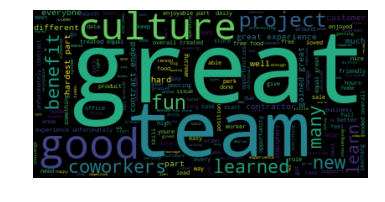

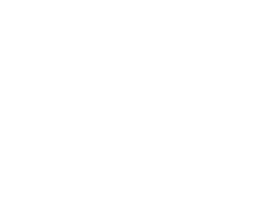

In [767]:
unhappy_google=reviews[reviews.company=='Google'].loc[reviews.tot_review <40,:]
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(unhappy_google['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

In [ ]:
reviews['review_content']=reviews['review_content'].fillna('')

In [ ]:
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(reviews[reviews.company=='Amazon.com']['review_content']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

In [121]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['Amazon.com','Google','Netflix','Facebook','Apple']
values = [len(reviews[reviews.company=='Amazon.com']),len(reviews[reviews.company=='Google']),
          len(reviews[reviews.company=='Netflix']),len(reviews[reviews.company=='Facebook']),
                                                       len(reviews[reviews.company=='Apple'])]

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1','rgb(177, 127, 38)']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

In [152]:
reviews.location[0].lower()

'1981 broadway new york, ny 10023'

In [450]:
reviews['location']=[reviews.location[i].lower() for i in range(len(reviews))]

KeyError: 23

In [ ]:
plt.figure(figsize=(12,6))
by_location_company=reviews.groupby(['company','location'])['tot_review'].mean()
by_location_company[by_location_company['company']=='Amazon.com'].plot.bar(color='r')

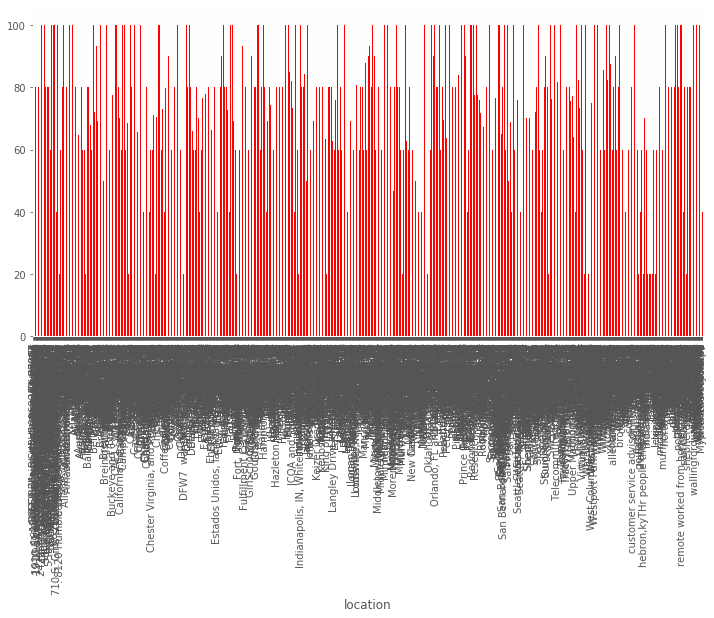

In [127]:
plt.figure(figsize=(12,6))# location column is inconsistent and hard to manipulate
reviews[reviews.company=='Amazon.com'].groupby('location')['tot_review'].mean().plot.bar(color='r')

In [150]:
subset_google.groupby('location').mean()


,tot_review,Comp_Benef_review,Job_Culture_review,Job_Security_Adv,Management_review,Work_Life_review
location,,,,,,
1100 eisenhower ann arbor,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
"Aguadilla, PR",100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
"Albuquerque, NM",100.000000,66.666667,100.000000,46.666667,86.666667,100.000000
"Alexandria, VA",80.000000,80.000000,100.000000,60.000000,100.000000,100.000000
"Alpharetta, GA",100.000000,80.000000,100.000000,40.000000,100.000000,100.000000
"Altamonte Springs, FL",100.000000,40.000000,100.000000,80.000000,60.000000,60.000000
"Amarillo, TX",100.000000,100.000000,40.000000,0.000000,80.000000,60.000000
"Ann Arbor, MI",73.913043,75.652174,75.652174,61.739130,60.000000,75.652174
Anna Nagar,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [179]:
subset_Apple=reviews[reviews.company=='Apple']

In [191]:
#subset_Apple.groupby('location')['location'].lower
subset_Apple['location']=[subset_Apple['location'][i].lower() for i in subset_Apple.index ]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [196]:
subset_Apple.groupby('location').mean()


,tot_review,Comp_Benef_review,Job_Culture_review,Job_Security_Adv,Management_review,Work_Life_review
location,,,,,,
1 centre st.,20.000000,100.000000,20.000000,20.000000,20.000000,20.000000
103 prince street,60.000000,80.000000,40.000000,80.000000,40.000000,60.000000
"12545 riata vista cir, austin, tx 78727",80.000000,60.000000,80.000000,40.000000,80.000000,80.000000
"12545 riata vista cirlce, austin, texas",100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
"1981 broadway new york, ny 10023",80.000000,100.000000,80.000000,60.000000,80.000000,80.000000
"3011 laguna blvd, elk grove, ca 95758",100.000000,100.000000,100.000000,40.000000,60.000000,80.000000
3111 elk grove,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
5th avenue,100.000000,100.000000,80.000000,60.000000,80.000000,60.000000
6380 e holmes rd memphis tn 38141,80.000000,80.000000,100.000000,40.000000,80.000000,80.000000


In [209]:
plt.figure(figsize=(12,6))
list(reviews.groupby('company')['tot_review'].mean().sort_values(ascending=False))

company
Google        85.690493
Facebook      84.958678
Apple         83.152688
Netflix       75.617978
Amazon.com    71.488170
Name: tot_review, dtype: float64

In [497]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['Google','Facebook','Apple','Netflix','Amazon.com']
y = list(reviews.groupby('company')['tot_review'].mean().sort_values(ascending=False))

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.6
        )]

py.iplot(data, filename='bar-direct-labels')

In [496]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['Apple','Google','Netflix','Facebook','Amazon.com']
y = list(reviews.groupby('company')['Comp_Benef_review'].mean().sort_values(ascending=False))

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(58,200,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

In [453]:
reviews.groupby('company')['Job_Culture_review'].mean().sort_values(ascending=False)

company
Google        4.187370
Facebook      4.132231
Apple         4.100860
Netflix       3.657303
Amazon.com    3.322845
Name: Job_Culture_review, dtype: float64

In [492]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['Google','Facebook','Apple','Netflix','Amazon.com']
y = list(reviews.groupby('company')['Job_Culture_review'].mean().sort_values(ascending=False))

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='#FF851B',
               
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

In [493]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['Apple','Facebook','Google','Amazon.com','Netflix']
y = list(reviews.groupby('company')['Job_Security_Adv'].mean().sort_values(ascending=False))

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='#3D9970',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

In [456]:
reviews.groupby('company')['Job_Security_Adv'].mean().sort_values(ascending=False)

company
Apple         3.616559
Facebook      3.537190
Google        3.487162
Amazon.com    3.126807
Netflix       2.983146
Name: Job_Security_Adv, dtype: float64

In [457]:
reviews.groupby('company')['Management_review'].mean().sort_values(ascending=False)

company
Google        3.769604
Apple         3.692903
Facebook      3.603306
Netflix       3.359551
Amazon.com    3.173128
Name: Management_review, dtype: float64

In [494]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['Google','Apple','Facebook','Netflix','Amazon.com']
y = list(reviews.groupby('company')['Management_review'].mean().sort_values(ascending=False))

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(214, 12, 140)',
                line=dict(
                    color='black',
                    width=1.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

In [459]:
reviews.groupby('company')['Work_Life_review'].mean().sort_values(ascending=False)

company
Google        4.158917
Facebook      4.082645
Apple         3.777419
Netflix       3.544944
Amazon.com    3.279476
Name: Work_Life_review, dtype: float64

In [495]:
import plotly.plotly as py
import plotly.graph_objs as go

x = ['Google','Facebook','Apple','Netflix','Amazon.com']
y = list(reviews.groupby('company')['Work_Life_review'].mean().sort_values(ascending=False))

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(177, 127, 38)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

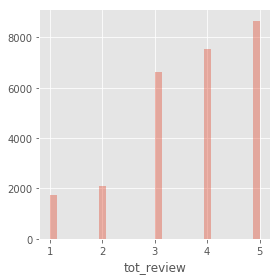

In [461]:
totGrid = sns.FacetGrid(reviews, palette="Set1", size=4)
totGrid.map(sns.distplot,'tot_review',kde=False)

In [463]:
reviews.columns

Index(['company', 'location', 'date', 'jobtitle', 'tot_review',
       'Comp_Benef_review', 'Job_Culture_review', 'Job_Security_Adv',
       'Management_review', 'Work_Life_review', 'title', 'review_content'],
      dtype='object')

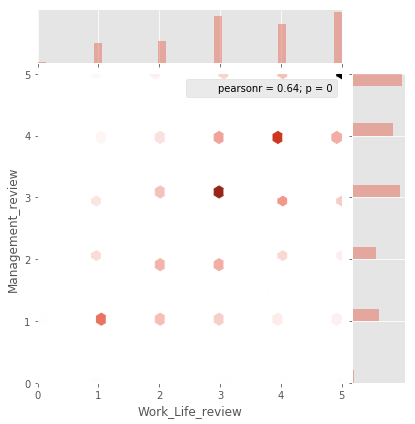

In [464]:
sns.jointplot(x='Work_Life_review',y='Management_review',data=reviews,kind='hex')

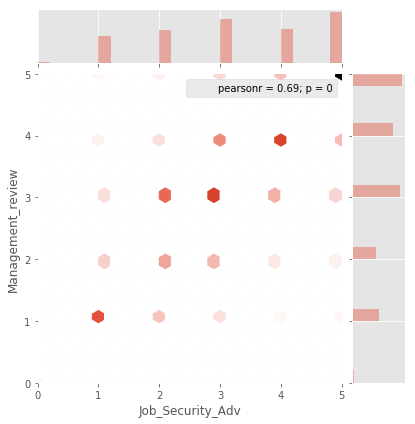

In [465]:
sns.jointplot(x='Job_Security_Adv',y='Management_review',data=reviews,kind='hex')

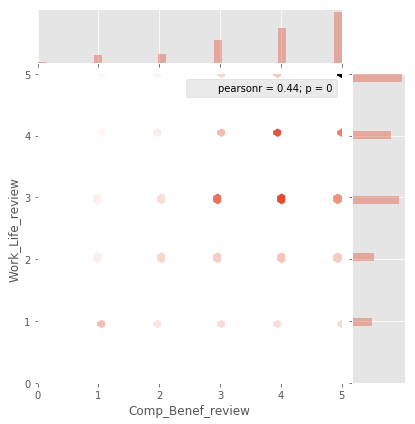

In [466]:
sns.jointplot(x='Comp_Benef_review',y='Work_Life_review',data=reviews,kind='hex')

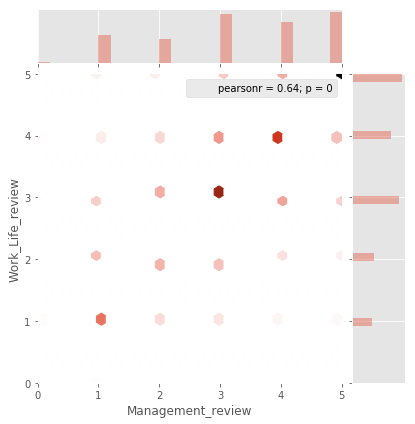

In [467]:
sns.jointplot(x='Management_review',y='Work_Life_review',data=reviews,kind='hex')

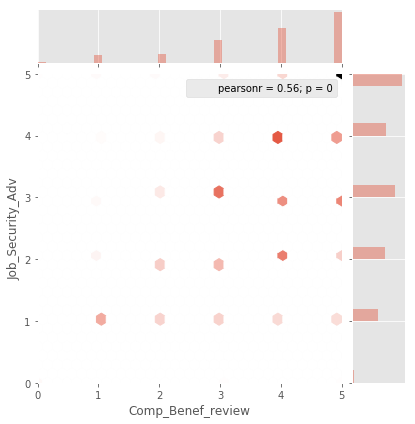

In [468]:
sns.jointplot(x='Comp_Benef_review',y='Job_Security_Adv',data=reviews,kind='hex')

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Heatmap(z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'])
data=[trace]
py.iplot(data, filename='labelled-heatmap')
Out[3]:


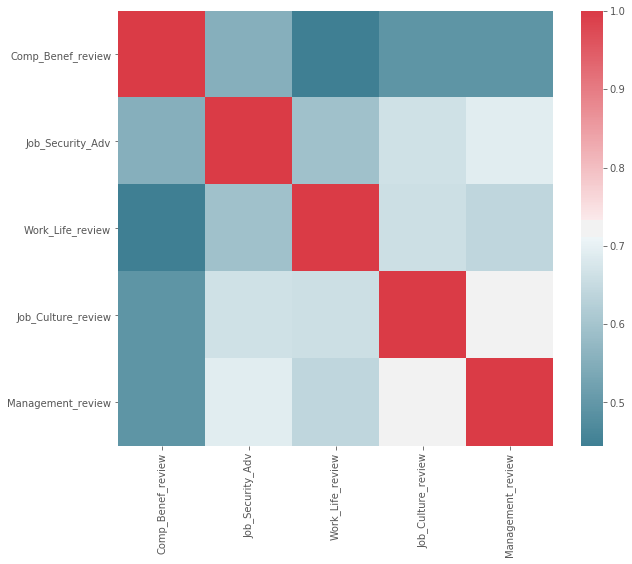

In [699]:
subset=reviews[['Comp_Benef_review','Job_Security_Adv' ,'Work_Life_review', 'Job_Culture_review' ,'Management_review']]
subset
f, ax = plt.subplots(figsize=(10, 8))
corr = subset.corr()
heatmap = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('heatmap.png')

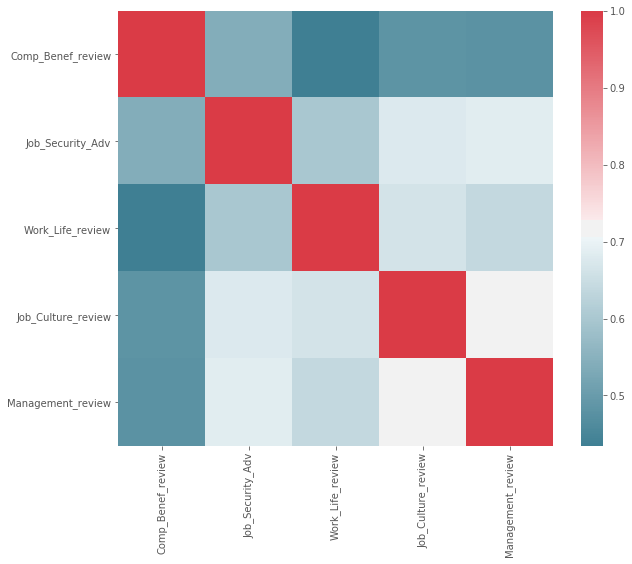

In [693]:
subset_only_amazon=reviews[reviews.company=='Amazon.com'][['Comp_Benef_review','Job_Security_Adv' ,'Work_Life_review', 'Job_Culture_review' ,'Management_review']]

f, ax = plt.subplots(figsize=(10, 8))
corr = subset_only_amazon.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

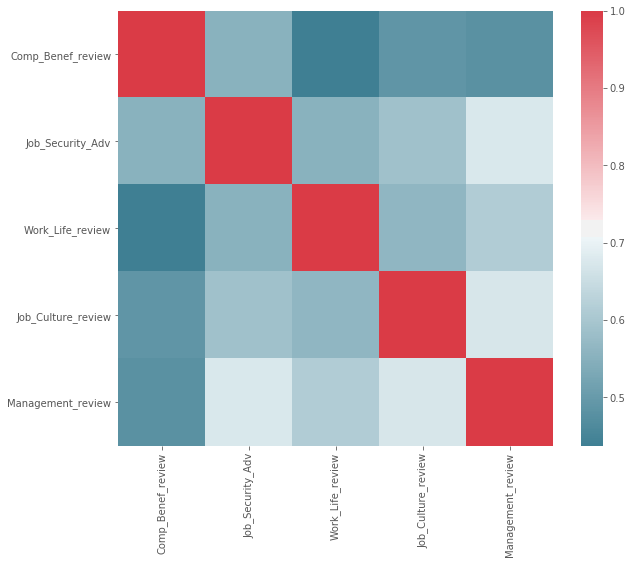

In [694]:
subset_only_Apple=reviews[reviews.company=='Apple'][['Comp_Benef_review','Job_Security_Adv' ,'Work_Life_review', 'Job_Culture_review' ,'Management_review']]

f, ax = plt.subplots(figsize=(10, 8))
corr = subset_only_Apple.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [536]:
#regex = re.compile('.*,[ ]?(..)')
#re.findall(regex,b)[0]
reviews['new'] = list(map(lambda x: re.findall(re.compile('.*,[ ]?(..)'),x),reviews['location']))
reviews.head()
reviews['new']=list(map(lambda y: y[0],reviews['new']))
reviews.head()

IndexError: list index out of range

In [544]:
 reviews['new']=list(map(lambda y: y[0] if y!=[] else y ,reviews['new']))

In [545]:
reviews.head()

,company,location,date,jobtitle,tot_review,Comp_Benef_review,Job_Culture_review,Job_Security_Adv,Management_review,Work_Life_review,title,review_content,new
0,Apple,"1981 Broadway New York, NY 10023",2016,Service Specialist,4.0,5.0,4.0,3.0,4.0,4.0,It is a very diverse fun job with many differe...,learned people well knowledge products learned...,NY
1,Apple,"Lancaster, PA",2018,Tech,5.0,4.0,4.0,5.0,4.0,5.0,Great place to work,many years leaving still speak hang people fam...,PA
2,Apple,"Silicon Valley, CA",2018,freelance designer,3.0,2.0,2.0,3.0,3.0,3.0,"Productive, yet tough",learned better ux design skills short difficul...,CA
3,Apple,"Los Angeles, CA",2018,Specialist,3.0,3.0,1.0,2.0,1.0,3.0,hmmm,fun mgmt busy stuff caring morale fine busines...,CA
4,Apple,"Cupertino, CA",2018,Sr Manager of Platform Architecture,3.0,5.0,3.0,3.0,4.0,1.0,Demanding,grueling commute oakland free lunches spread o...,CA


'f'

In [661]:
subset_reviews=reviews[list(map(lambda s: len(s)>0,reviews['new']))]

In [662]:
subset_reviews['new']=[subset_reviews['new'][i].upper() for i in subset_reviews.index]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [663]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
#subset_reviews['new']=[subset_reviews['new'] for i in subset_reviews.index]

In [664]:
subset_reviews=subset_reviews[subset_reviews.new.isin(states)]

In [653]:
subset_reviews=subset_reviews.groupby(['company','new']).mean()
subset_reviews.columns
subset_reviews.index
test=subset_reviews.reset_index()
test

,company,new,tot_review,Comp_Benef_review,Job_Culture_review,Job_Security_Adv,Management_review,Work_Life_review
0,Amazon.com,AL,3.266667,2.333333,3.333333,2.733333,2.733333,3.133333
1,Amazon.com,AR,3.600000,3.900000,3.300000,3.700000,3.600000,3.200000
2,Amazon.com,AZ,3.796909,3.771523,3.518764,3.347682,3.284768,3.471302
3,Amazon.com,CA,3.626103,3.697167,3.447283,3.217836,3.249884,3.360892
4,Amazon.com,CO,3.707692,3.153846,3.523077,3.153846,3.246154,3.553846
5,Amazon.com,CT,3.379845,3.496124,3.077519,3.054264,3.023256,3.224806
6,Amazon.com,DC,4.166667,4.333333,4.000000,4.166667,3.666667,3.500000
7,Amazon.com,DE,3.549383,3.742798,3.316872,3.160494,3.123457,3.063786
8,Amazon.com,FL,3.590846,3.646325,3.431345,3.126214,3.228849,3.337032
9,Amazon.com,GA,3.823377,3.680519,3.670130,3.288312,3.350649,3.670130


In [772]:
x = list(test['new'])
y = test[test.company=='Amazon.com']['tot_review']

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(177, 127, 38)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

In [641]:
reviews.columns

Index(['company', 'location', 'date', 'jobtitle', 'tot_review',
       'Comp_Benef_review', 'Job_Culture_review', 'Job_Security_Adv',
       'Management_review', 'Work_Life_review', 'title', 'review_content',
       'new'],
      dtype='object')

In [656]:
 test[test.company=='Amazon.com']['tot_review']

0     3.266667
1     3.600000
2     3.796909
3     3.626103
4     3.707692
5     3.379845
6     4.166667
7     3.549383
8     3.590846
9     3.823377
10    3.405316
11    3.723553
12    3.675799
13    3.569558
14    2.500000
15    3.481481
16    3.453861
17    4.500000
18    3.629630
19    3.500000
20    3.250000
21    5.000000
22    5.000000
23    3.849246
24    4.015873
25    4.500000
26    4.111111
27    3.596708
28    3.726950
29    3.082593
30    3.481633
31    4.181818
32    3.530120
33    3.559642
34    3.591678
35    3.501029
36    3.617647
37    3.400000
38    3.603926
39    3.595968
40    3.399002
41    4.120690
Name: tot_review, dtype: float64

In [655]:
subset_reviews[subset_reviews.company=='Amazon.com']['tot_review']

AttributeError: 'DataFrame' object has no attribute 'company'

In [773]:
group_count_mean=subset_reviews.groupby(['company','new']).agg(['mean','count'])

In [774]:
overH=group_count_mean[group_count_mean.tot_review['count']>100].reset_index()

In [775]:
overH_amazon=overH[overH.company=='Amazon.com']

In [776]:
x = overH_amazon.new
y = overH_amazon.tot_review['mean']

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(177, 127, 38)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

In [680]:
overH_apple=overH[overH.company=='Apple']

In [681]:
x = overH_apple.new
y = overH_apple.tot_review['mean']

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(177, 127, 38)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')

In [682]:
overH_google=overH[overH.company=='Google']

In [684]:
x = overH_google.new
y = overH_google.tot_review['mean']

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(177, 127, 38)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6, 
        )]
     
py.iplot(data, filename='bar-direct-labels')